YOUR NAME
 - Collaborator 1
 - Collaborator 2
 - etc

DS325, Gettysburg College, Professor Eatai Roth
# Problem Set 2 - Classification

Due Friday Mar 28, 2025 4p

Total pts: 30

## IMPORTANT INSTRUCTIONS:

 - When you submit your code, make sure that every cell runs without returning an error.
 - Once you have the results you need, edit out any extraneous code and outputs.
 - *Do not rewrite code* if it doesn't need to be rewritten. For example, all the import statements you should need are in the first code block. Do not redo those in your analysis.

## Problem 1

In this problem, you'll be comparing Logistic Regression, Decision Trees, and Random Forests in a task identifying mushrooms as edible or poisonous.
The data is imported below and the features and feature values are listed. Notice, they're all letters.

 - Split the data into targets and features
 - Decide which features are ordinal or categorical. Refer to the feature descriptions on the [UCI Machine Learning site](https://archive.ics.uci.edu/dataset/73/mushroom) (hint: at least 3 categories are ordinal and others are binary...so you'll use an ordinal encoder)
 - Encode the features
 - Train the three models. You will want to use ```LogisticRegressionCV``` and ```GridSearchCV``` to find the best version of each model.
 - Make predictions with your models.
 - Show the confusion matrices for each type of model evaluated on the same test set. Label each figure clearly as to which model it is.

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
mushrooms_df = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/refs/heads/master/mushrooms.csv')

for k, col in enumerate(mushrooms_df.columns):
    print(f'{k:>3}. {col} - {mushrooms_df[col].unique()}')
    
    


  0. type - ['p' 'e']
  1. cap_shape - ['x' 'b' 's' 'f' 'k' 'c']
  2. cap_surface - ['s' 'y' 'f' 'g']
  3. cap_color - ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
  4. bruises - ['t' 'f']
  5. odor - ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
  6. gill_attachment - ['f' 'a']
  7. gill_spacing - ['c' 'w']
  8. gill_size - ['n' 'b']
  9. gill_color - ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
 10. stalk_shape - ['e' 't']
 11. stalk_root - ['e' 'c' 'b' 'r' '?']
 12. stalk_surface_above_ring - ['s' 'f' 'k' 'y']
 13. stalk_surface_below_ring - ['s' 'f' 'y' 'k']
 14. stalk_color_above_ring - ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
 15. stalk_color_below_ring - ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
 16. veil_type - ['p']
 17. veil_color - ['w' 'n' 'o' 'y']
 18. ring_number - ['o' 't' 'n']
 19. ring_type - ['p' 'e' 'l' 'f' 'n']
 20. spore_print_color - ['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
 21. population - ['s' 'n' 'a' 'v' 'y' 'c']
 22. habitat - ['u' 'g' 'm' 'd' 'p' 'w' 'l']


In [ ]:
lisp = []
for col in mushrooms_df.columns:
    lisp.append(mushrooms_df[col].unique())

list(lisp)

[['x', 'b', 's', 'f', 'k', 'c'],['s', 'y', 'f', 'g'],['n', 'y', 'w', 'g', 'e', 'p', 'b', 'u', 'c', 'r'],['t', 'f'],['p', 'a', 'l', 'n', 'f', 'c', 'y', 's', 'm'],['f', 'a'],['c', 'w'],['n', 'b'],['k', 'n', 'g', 'p', 'w', 'h', 'u', 'e', 'b', 'r', 'y', 'o'],['e', 't'],['e', 'c', 'b', 'r', '?'],['s', 'f', 'k', 'y'],['s', 'f', 'y', 'k'],['w', 'g', 'p', 'n', 'b', 'e', 'o', 'c', 'y'],['w', 'p', 'g', 'b', 'n', 'e', 'y', 'o', 'c'],['p'],['w', 'n', 'o', 'y'],['o', 't', 'n'],['p', 'e', 'l', 'f', 'n'],['k', 'n', 'u', 'h', 'w', 'r', 'o', 'y', 'b'],['s', 'n', 'a', 'v', 'y', 'c'],['u', 'g', 'm', 'd', 'p', 'w', 'l'],]

[array(['p', 'e'], dtype=object),
 array(['x', 'b', 's', 'f', 'k', 'c'], dtype=object),
 array(['s', 'y', 'f', 'g'], dtype=object),
 array(['n', 'y', 'w', 'g', 'e', 'p', 'b', 'u', 'c', 'r'], dtype=object),
 array(['t', 'f'], dtype=object),
 array(['p', 'a', 'l', 'n', 'f', 'c', 'y', 's', 'm'], dtype=object),
 array(['f', 'a'], dtype=object),
 array(['c', 'w'], dtype=object),
 array(['n', 'b'], dtype=object),
 array(['k', 'n', 'g', 'p', 'w', 'h', 'u', 'e', 'b', 'r', 'y', 'o'],
       dtype=object),
 array(['e', 't'], dtype=object),
 array(['e', 'c', 'b', 'r', '?'], dtype=object),
 array(['s', 'f', 'k', 'y'], dtype=object),
 array(['s', 'f', 'y', 'k'], dtype=object),
 array(['w', 'g', 'p', 'n', 'b', 'e', 'o', 'c', 'y'], dtype=object),
 array(['w', 'p', 'g', 'b', 'n', 'e', 'y', 'o', 'c'], dtype=object),
 array(['p'], dtype=object),
 array(['w', 'n', 'o', 'y'], dtype=object),
 array(['o', 't', 'n'], dtype=object),
 array(['p', 'e', 'l', 'f', 'n'], dtype=object),
 array(['k', 'n', 'u', 'h', 

In [7]:
'''your code here. add cells as needed'''

mushrooms_df.describe()

,type,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [27]:
list(mushrooms_df.columns)

['type',
 'cap_shape',
 'cap_surface',
 'cap_color',
 'bruises',
 'odor',
 'gill_attachment',
 'gill_spacing',
 'gill_size',
 'gill_color',
 'stalk_shape',
 'stalk_root',
 'stalk_surface_above_ring',
 'stalk_surface_below_ring',
 'stalk_color_above_ring',
 'stalk_color_below_ring',
 'veil_type',
 'veil_color',
 'ring_number',
 'ring_type',
 'spore_print_color',
 'population',
 'habitat']

In [44]:
target = ['type']

X = mushrooms_df.drop(columns = 'type')
y = mushrooms_df[target]

ord_features = list(X.columns)
ords = [['x', 'b', 's', 'f', 'k', 'c'],['s', 'y', 'f', 'g'],['n', 'y', 'w', 'g', 'e', 'p', 'b', 'u', 'c', 'r'],['t', 'f'],['p', 'a', 'l', 'n', 'f', 'c', 'y', 's', 'm'],['f', 'a'],['c', 'w'],['n', 'b'],['k', 'n', 'g', 'p', 'w', 'h', 'u', 'e', 'b', 'r', 'y', 'o'],['e', 't'],['e', 'c', 'b', 'r', '?'],['s', 'f', 'k', 'y'],['s', 'f', 'y', 'k'],['w', 'g', 'p', 'n', 'b', 'e', 'o', 'c', 'y'],['w', 'p', 'g', 'b', 'n', 'e', 'y', 'o', 'c'],['p'],['w', 'n', 'o', 'y'],['o', 't', 'n'],['p', 'e', 'l', 'f', 'n'],['k', 'n', 'u', 'h', 'w', 'r', 'o', 'y', 'b'],['s', 'n', 'a', 'v', 'y', 'c'],['u', 'g', 'm', 'd', 'p', 'w', 'l']]

ordEnc = OrdinalEncoder(categories = ords)
X_enc = ordEnc.fit(X)
X_enc = X_enc.transform(X)
X_enc

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 1., 1., 1.],
       [1., 0., 2., ..., 1., 1., 2.],
       ...,
       [3., 0., 0., ..., 8., 5., 6.],
       [4., 1., 0., ..., 4., 3., 6.],
       [0., 0., 0., ..., 6., 5., 6.]])

In [ ]:
target = ['type']

X = mushrooms_df.drop(columns = 'type')
y = mushrooms_df[target]

ord_features = list(X.columns)



OrdinalEncoder(categories = )


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Encode categorical features
encoder = OrdinalEncoder()
X_train_encoded = encoder.fit_transform(X_train)
X_test_encoded = encoder.transform(X_test)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train_encoded, y_train)

# Make predictions
y_pred = model.predict(X_test_encoded)

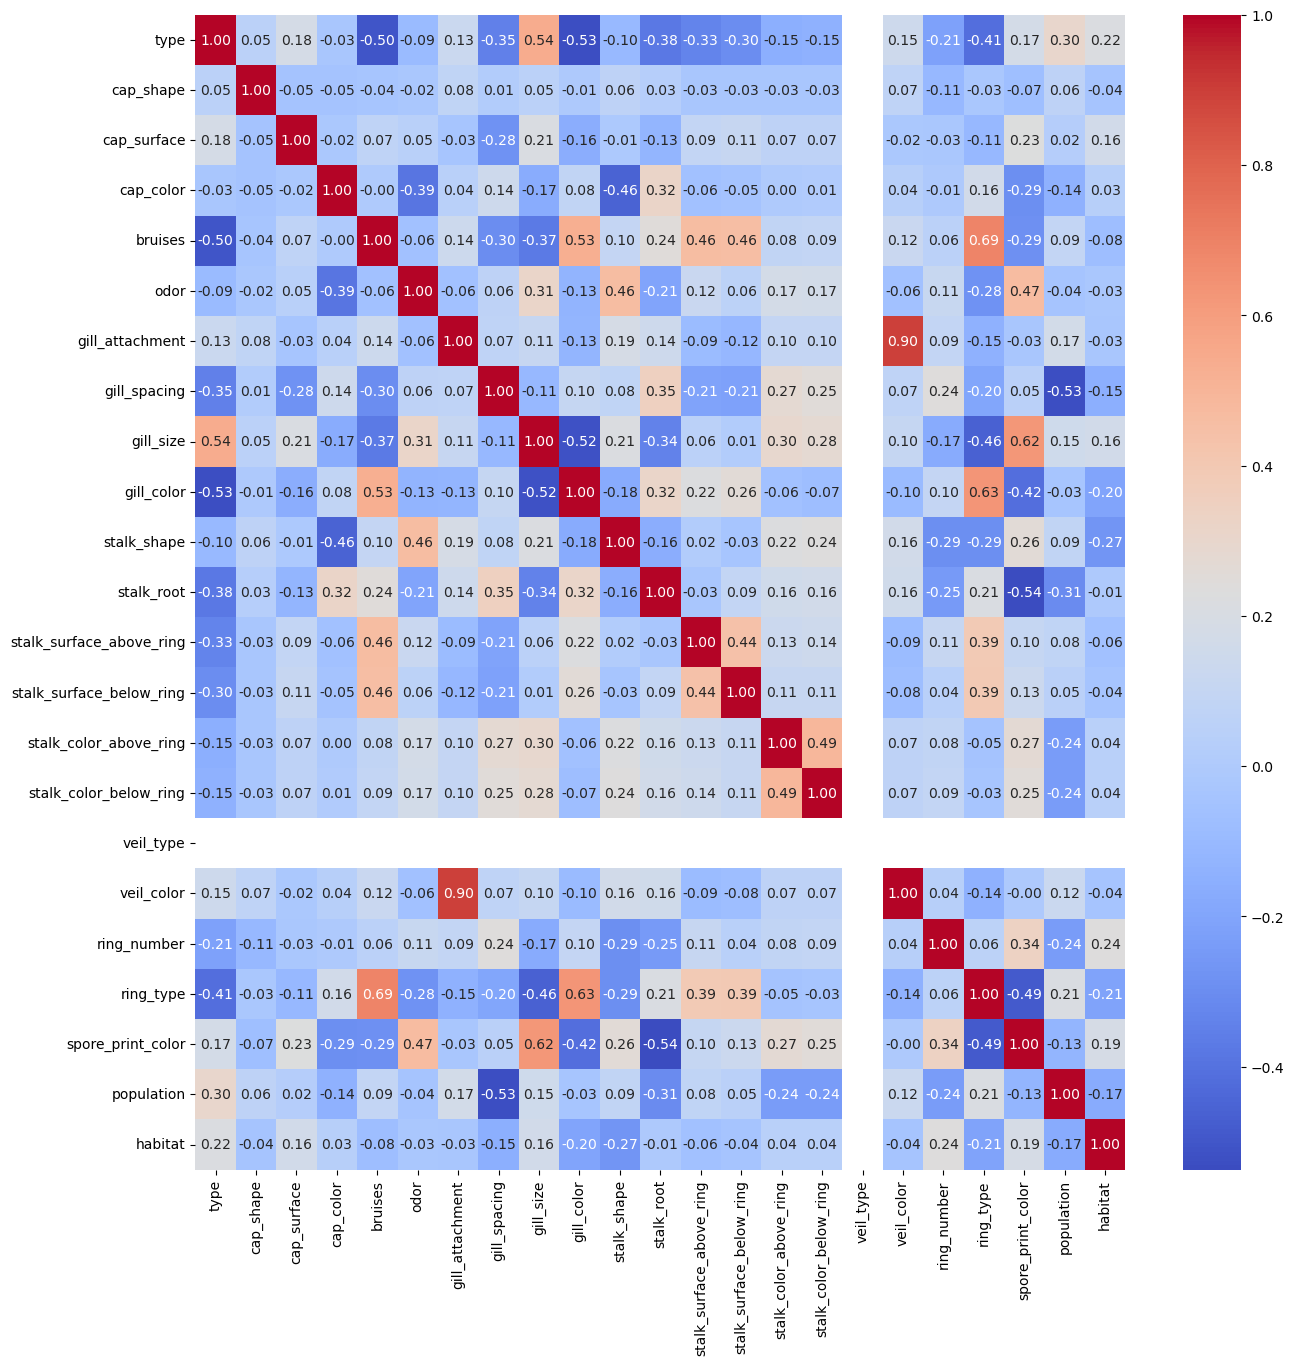

In [22]:
# Encode categorical features into numeric values
encoded_df = mushrooms_df.apply(LabelEncoder().fit_transform)

# Compute the correlation matrix
mushrooms_corr = encoded_df.corr()

# Plot the heatmap
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
sns.heatmap(mushrooms_corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

### Problem 1 questions

 - Which model was best?
 - What were the hyper-parameters of this model.
 - What were the accuracy, recall, and precision of the model.
 - Of accuracy, recall, precision, which did you use to decide the best model.

#### Your responses here:

- Which model: 
- Hyper-parameters:
- Metrics
    - Accuracy:
    - Recall:
    - Precision:
- How did you decide best? 

## Problem 2

The NFL draft is coming up at the end of April. This is when NFL teams get to select college players to join their team. The draft comprises seven rounds over three days (day 1: round 1, day 2: rounds 2 and 3, day 3: rounds 4, 5, 6, 7) with teams taking turns selecting players. Better players tend to go in earlier rounds.

In this problem, you will try to predict whether defensive players are drafted on Day 1, 2, or 3 based on their performance in the NFL combine (an assay of physical skills).

The data are imported below.

 - Create a target variable for day 1, day 2, day 3 based on the round drafted.
 - Create the most accurate predictor you can using any method or subset of the data you choose. *You may not use round as a feature!*
 - Show the confusion matrix for your model and list the accuracy of your model.

In [ ]:
nfl_draft = pd.read_csv('https://raw.githubusercontent.com/eatai/datasets/refs/heads/main/nfl_defensive_draft.csv')

### Problem 2 Questions

 - Which kind of model did you use and why did you choose it?
 - What was your accuracy?